### Import Libraries and Data

In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Filter Data for the ASEAN countries

Filter the data for the market of the ASEAN countries

In [3]:
ASEAN = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_ASEAN = df[df['job_country'].isin(ASEAN)]

In [4]:
df_skills = df_ASEAN.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
25,Senior Data Analyst,sql
44,Data Scientist,python
44,Data Scientist,java
44,Data Scientist,scala
47,Senior Data Engineer,sql
...,...,...
785736,Software Engineer,kubernetes
785736,Software Engineer,docker
785736,Software Engineer,ansible
785738,Business Analyst,powerpoint


In [5]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name= 'skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1393,sql,Data Analyst,7397
1394,sql,Data Engineer,6805
1102,python,Data Engineer,6217
398,excel,Data Analyst,6168
1101,python,Data Analyst,5370
...,...,...,...
493,ggplot2,Senior Data Scientist,1
996,phoenix,Machine Learning Engineer,1
1568,unity,Machine Learning Engineer,1
997,phoenix,Senior Data Analyst,1


In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

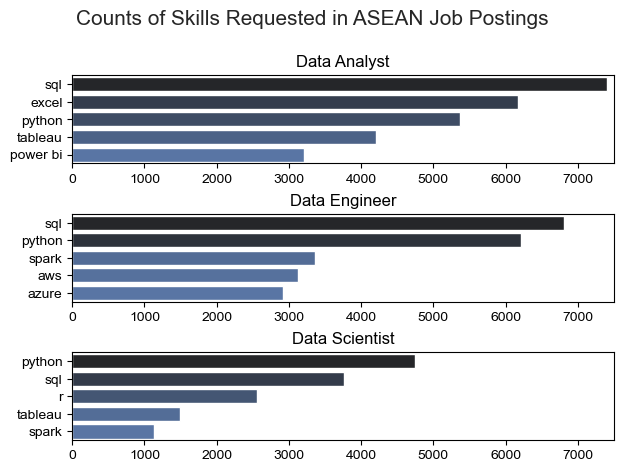

In [7]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, y='job_skills', x='skill_count', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 7500)

fig.suptitle('Counts of Skills Requested in ASEAN Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [8]:
df_title_count = df_ASEAN['job_title_short'].value_counts().reset_index(name='job_total')

df_title_count

,job_title_short,job_total
0,Data Analyst,16242
1,Data Engineer,11801
2,Data Scientist,8095
3,Business Analyst,5770
4,Software Engineer,3899
5,Senior Data Analyst,2428
6,Senior Data Engineer,2141
7,Senior Data Scientist,1568
8,Machine Learning Engineer,1314
9,Cloud Engineer,1171


In [9]:
df_skills_per = pd.merge(df_skills_count, df_title_count, on='job_title_short', how='left')

df_skills_per['skills_percent'] = (df_skills_per['skill_count']/df_skills_per['job_total']) * 100

df_skills_per

,job_skills,job_title_short,skill_count,job_total,skills_percent
0,sql,Data Analyst,7397,16242,45.542421
1,sql,Data Engineer,6805,11801,57.664605
2,python,Data Engineer,6217,11801,52.681976
3,excel,Data Analyst,6168,16242,37.975619
4,python,Data Analyst,5370,16242,33.062431
...,...,...,...,...,...
1700,ggplot2,Senior Data Scientist,1,1568,0.063776
1701,phoenix,Machine Learning Engineer,1,1314,0.076104
1702,unity,Machine Learning Engineer,1,1314,0.076104
1703,phoenix,Senior Data Analyst,1,2428,0.041186


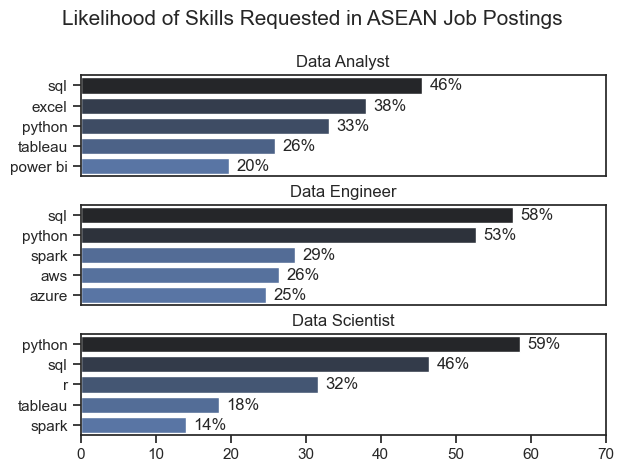

In [19]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_per[df_skills_per['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, y='job_skills', x='skills_percent', ax=ax[i], hue='skills_percent', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,70)
    ax[i].get_legend().remove()
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    for n, v in enumerate(df_plot['skills_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in ASEAN Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()